In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [72]:
data=pd.read_excel('Table2.xlsx',engine='openpyxl')
data=data.drop('COM',axis=1)
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data=data.drop('PPMINI20',axis=1)
data=data.drop('PIMPOT20',axis=1)

data

,NPERC1_CS2_2473,NPERC4_CS2_2466,Sphère productive 2008,Emploi total 2013,loypredm2,nbobs_mail,EFF_LZ,EFF_TOT,P20_EMPLT_SAL,ETOQ20,NTLBIN
0,0,0,60.685560,152.016469,5.837054,1735,0,65,75.598988,2,0
1,10,0,12.618480,52.540244,7.383331,636,0,31,31.547057,3,0
2,5,10,92.665089,159.401846,8.227492,538,0,92,98.783253,5,0
3,34,0,219.524184,744.807620,8.708889,493,1,488,576.529129,15,0
4,20,5,43.415560,70.329086,7.655703,507,0,39,39.047802,3,0
...,...,...,...,...,...,...,...,...,...,...,...
4303,26,0,40.358112,171.457403,9.938776,1210,0,125,150.072601,5,0
4304,13,0,105.602735,193.291963,8.402610,30998,2,88,108.639065,2,0
4305,10,0,30.108083,49.970643,7.655703,507,0,15,8.008589,1,0
4306,55,0,119.410463,507.438854,9.938776,1210,2,550,410.924101,2,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NPERC1_CS2_2473         4308 non-null   int64  
 1   NPERC4_CS2_2466         4308 non-null   int64  
 2   Sphère productive 2008  4308 non-null   float64
 3   Emploi total 2013       4308 non-null   float64
 4   loypredm2               4308 non-null   float64
 5   nbobs_mail              4308 non-null   int64  
 6   EFF_LZ                  4308 non-null   int64  
 7   EFF_TOT                 4308 non-null   int64  
 8   P20_EMPLT_SAL           4308 non-null   float64
 9   ETOQ20                  4308 non-null   int64  
 10  NTLBIN                  4308 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 370.3 KB


In [82]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
NPERC1_CS2_2473           0.332784
NPERC4_CS2_2466           0.358770
Sphère productive 2008    0.317811
Emploi total 2013         0.310286
loypredm2                 0.153533
nbobs_mail                0.093589
EFF_LZ                    0.207121
EFF_TOT                   0.279633
P20_EMPLT_SAL             0.296233
ETOQ20                    0.341737
NTLBIN                    1.000000
Name: NTLBIN, dtype: float64


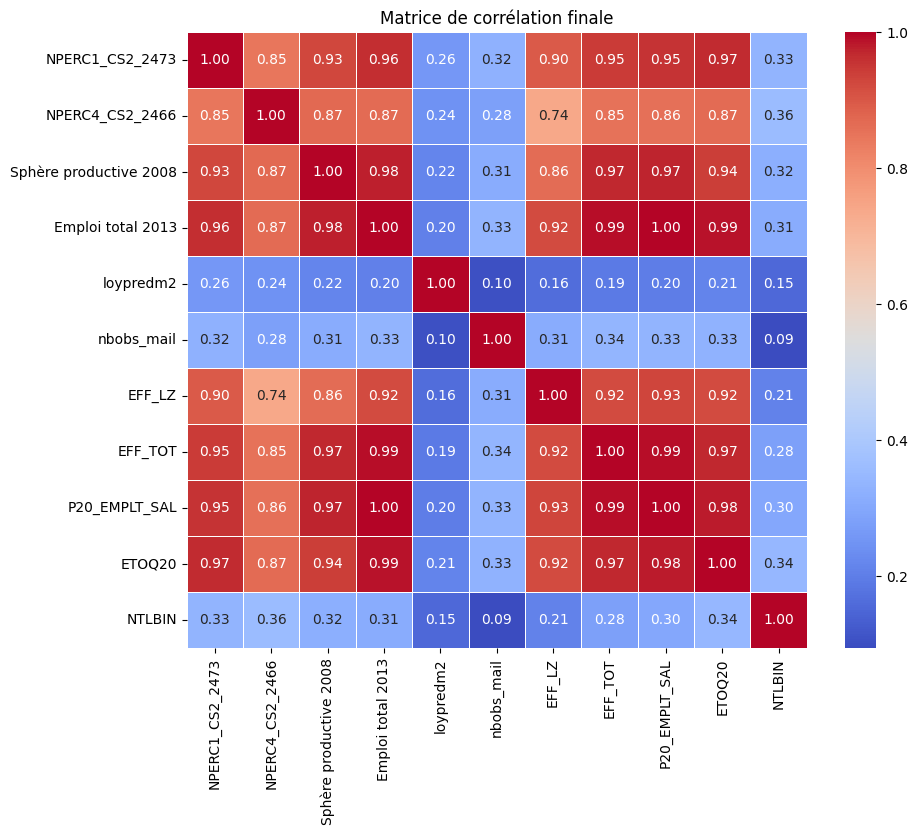

In [81]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.9999).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


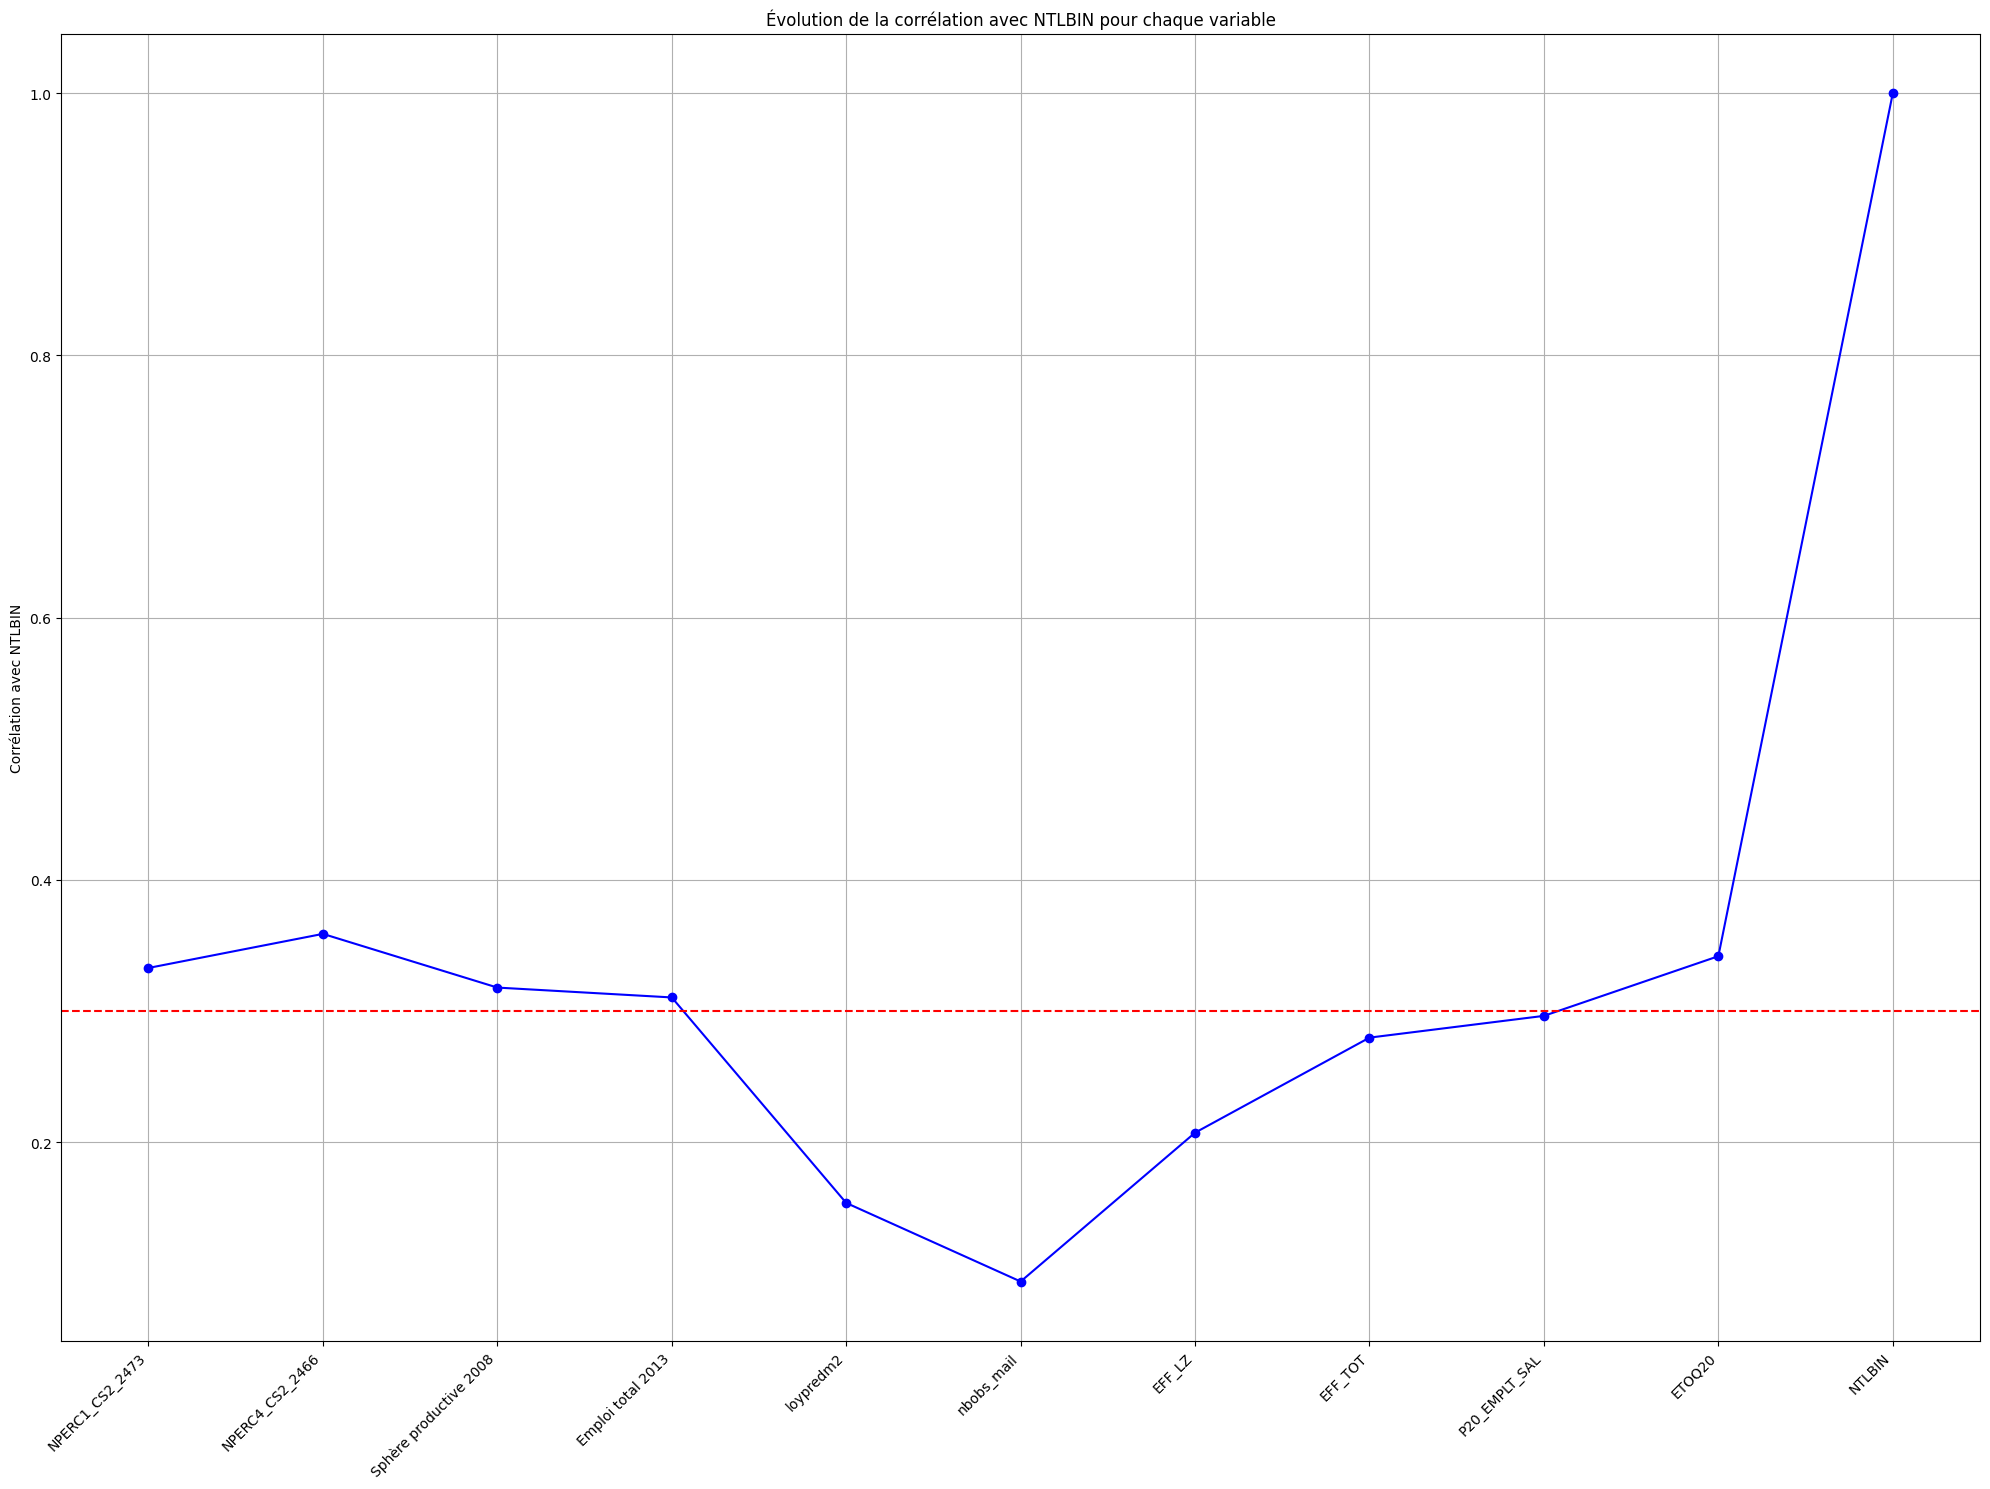

In [76]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


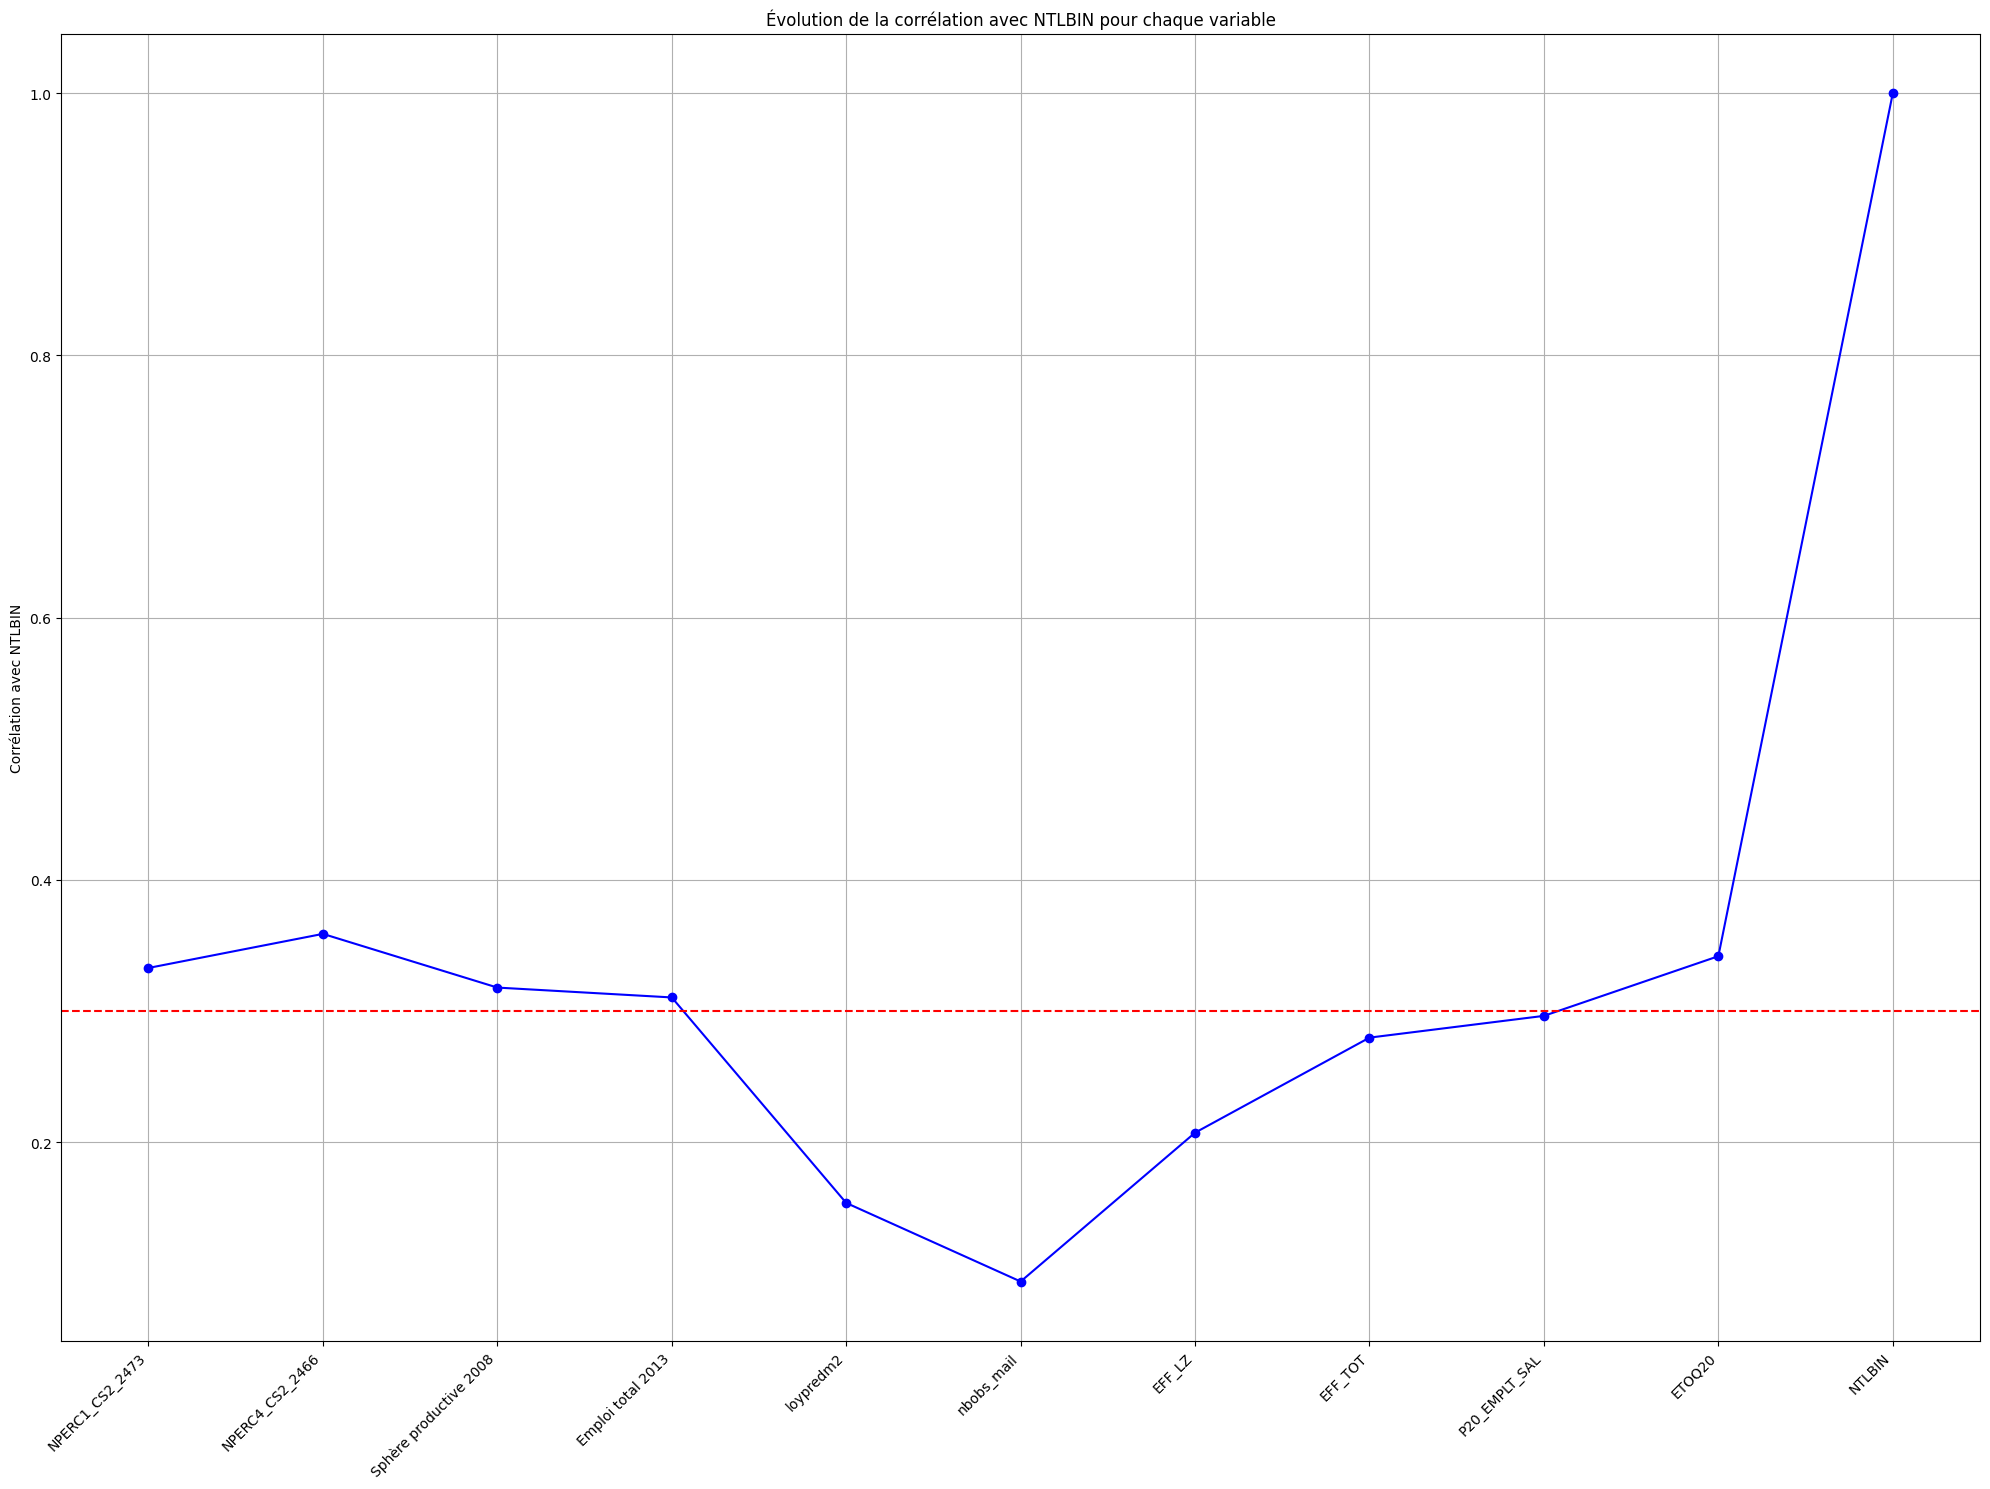

In [77]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()

In [78]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['NTLBIN'])
def calculate_vif(X):
    #X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialiser X avec vos données (sans la variable cible)


# Calculer les VIF initiaux
vif_data = calculate_vif(X)
print(vif_data)

# Boucle pour supprimer les variables avec VIF très élevés
high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    # Trouver la variable avec le VIF le plus élevé
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]  # Ignorer la constante
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    
    # Supprimer cette variable de X
    X = X.drop(columns=[max_vif_variable])
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)

                 Variable          VIF
0         NPERC1_CS2_2473    19.940636
1         NPERC4_CS2_2466     5.680516
2  Sphère productive 2008    36.999571
3       Emploi total 2013  1114.434565
4               loypredm2     1.640791
5              nbobs_mail     1.399023
6                  EFF_LZ    12.698184
7                 EFF_TOT    83.676612
8           P20_EMPLT_SAL   587.207473
9                  ETOQ20    84.309197
Suppression de la variable avec le VIF le plus élevé: Emploi total 2013
                 Variable         VIF
0         NPERC1_CS2_2473   16.276389
1         NPERC4_CS2_2466    5.653477
2  Sphère productive 2008   32.899883
3               loypredm2    1.601607
4              nbobs_mail    1.396549
5                  EFF_LZ   10.073552
6                 EFF_TOT   65.394150
7           P20_EMPLT_SAL  154.689920
8                  ETOQ20   48.450198
Suppression de la variable avec le VIF le plus élevé: P20_EMPLT_SAL
                 Variable        VIF
0         NPER

In [80]:
colonnes=['Sphère productive 2008','loypredm2','NPERC4_CS2_2466','nbobs_mail','NTLBIN','EFF_LZ']
newdata=data[colonnes]
X = newdata.drop(columns=['NTLBIN'])

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())


'''0         NPERC4_CS2_2466  4.636253
1  Sphère productive 2008  7.820687
2               loypredm2  1.394429
3              nbobs_mail  1.374010
4                  EFF_LZ  4.028378
'''

Optimization terminated successfully.
         Current function value: 0.161318
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4308
Model:                          Logit   Df Residuals:                     4303
Method:                           MLE   Df Model:                            4
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.1248
Time:                        17:36:21   Log-Likelihood:                -694.96
converged:                       True   LL-Null:                       -794.09
Covariance Type:            nonrobust   LLR p-value:                 8.889e-42
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Sphère productive 2008     0.0008      0.000      4.977      0.000       0.000      

'0         NPERC4_CS2_2466  4.636253\n1  Sphère productive 2008  7.820687\n2               loypredm2  1.394429\n3              nbobs_mail  1.374010\n4                  EFF_LZ  4.028378\n'

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[816   4]
 [ 36   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       820
           1       0.60      0.14      0.23        42

    accuracy                           0.95       862
   macro avg       0.78      0.57      0.60       862
weighted avg       0.94      0.95      0.94       862


Accuracy Score:
0.9535962877030162


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


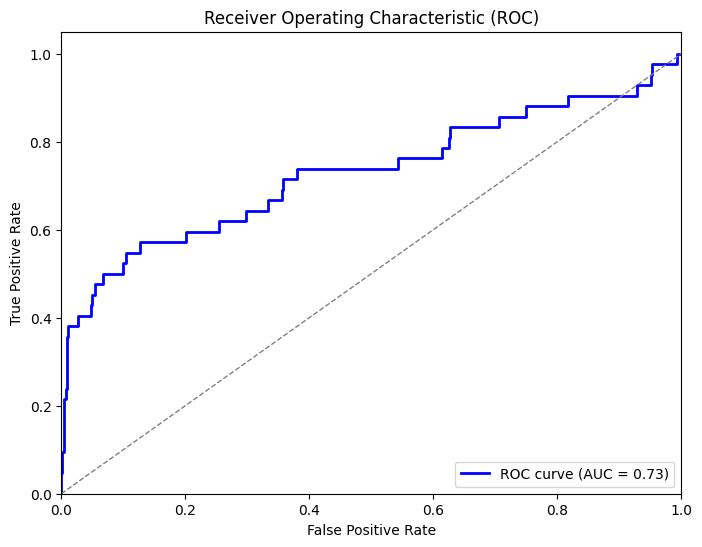

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

NEWWWWWWWWWWWWWW


In [90]:
data1=pd.read_csv('datafinbrutes.csv')
data1=data1.drop('N TL',axis=1)
#data1=data1.drop('COM',axis=1)
data1=data1.drop('Nom Commune',axis=1)

data=pd.read_excel('Table2.xlsx',engine='openpyxl')
#data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data=data.drop('PPMINI20',axis=1)
data=data.drop('PIMPOT20',axis=1)


datafin = pd.merge(data, data1, on='COM', how='left')

In [91]:
data=datafin
data=data.drop('COM',axis=1)


In [92]:
numerical_data = data.select_dtypes(exclude=['object'])
correlations = numerical_data.corr()['NTLBIN']
#print(correlations)
threshold = 0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à 0.3 :
NPERC1_CS2_2473           0.332784
NPERC4_CS2_2466           0.358770
Sphère productive 2008    0.317811
Emploi total 2013         0.310286
ETOQ20                    0.341737
P20_SCOL1517              0.369496
ETTEF2021                 0.320979
P20_NSCOL15P_CAPBEP       0.415408
P20_NSCOL15P_BAC          0.369328
P20_NSCOL15P_SUP2         0.344966
P20_NSCOL15P_SUP34        0.301392
ETTEF5021                 0.314096
ETTEF1021                 0.316242
ETTEF121                  0.321291
ETTEF021                  0.307884
P20_POP1564               0.321130
P20_ACT1564               0.324934
P20_ACTOCC1564            0.322718
P20_CHOMEUR1564           0.332182
P20_CHOM_DIPLMIN          0.348797
P20_ACT_DIPLMIN           0.366116
P20_INACT1564             0.307981
P20_RETR1564              0.403362
P20_AINACT1564            0.354637
C20_ACT1564_CS2           0.332032
C20_ACT1564_CS4           0.312003
NBPERSMENFISC20           0.352502
NTLBIN               

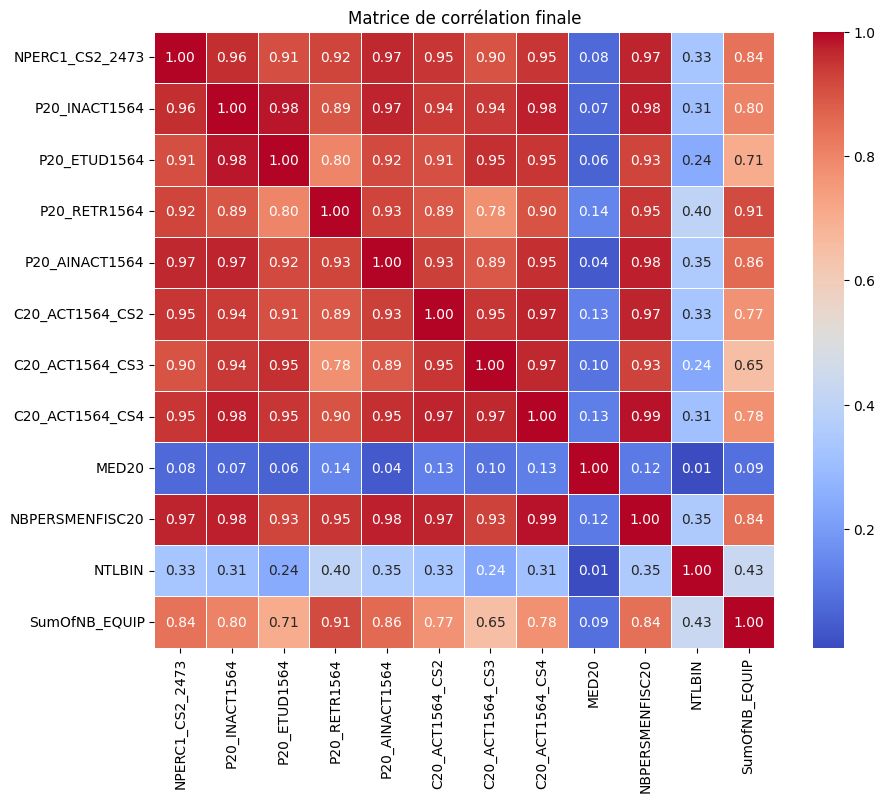

In [93]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.995).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


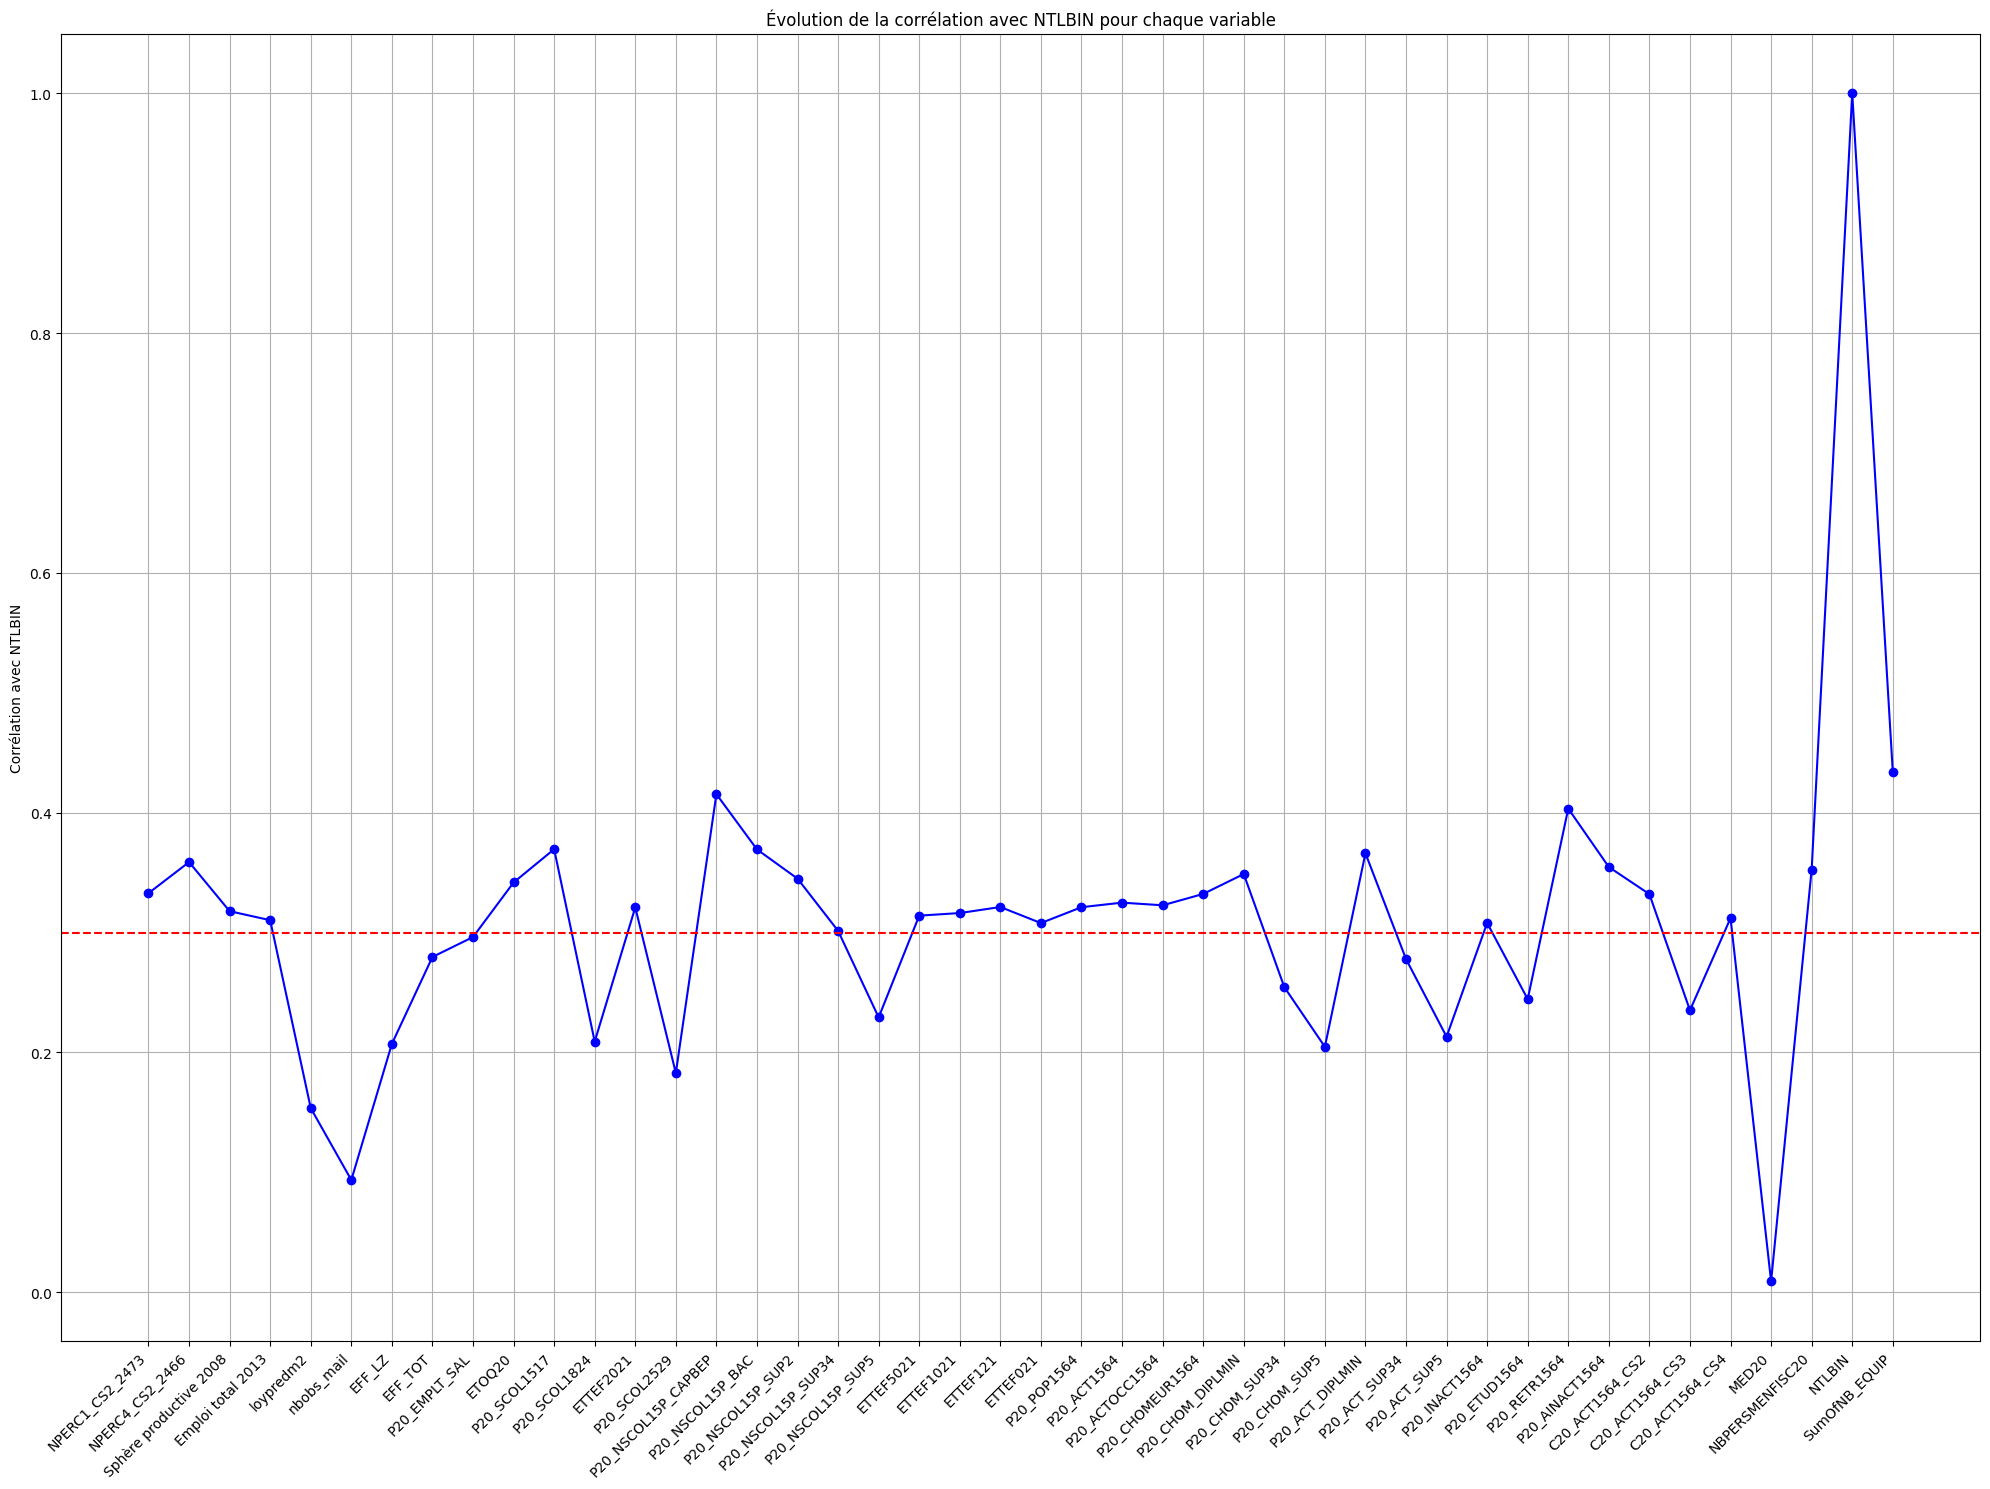

In [94]:


#correlation_df = pd.DataFrame(correlations.values(), index=correlations.keys(), columns=['Corrélation'])

# Assurez-vous que l'index est au bon format (si nécessaire)
# correlation_df.index = pd.to_datetime(correlation_df.index)

# Tracez le graphique de l'évolution de la corrélation au fil du temps
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [97]:
median_values = data.select_dtypes(include=np.number).median()


data.fillna(median_values, inplace=True)

In [98]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=data.drop(columns=['NTLBIN'])
def calculate_vif(X):
    #X = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialiser X avec vos données (sans la variable cible)


# Calculer les VIF initiaux
vif_data = calculate_vif(X)
print(vif_data)

# Boucle pour supprimer les variables avec VIF très élevés
high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    # Trouver la variable avec le VIF le plus élevé
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]  # Ignorer la constante
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    
    # Supprimer cette variable de X
    X = X.drop(columns=[max_vif_variable])
    
    # Recalculer les VIF
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Variable          VIF
0          NPERC1_CS2_2473   141.569439
1          NPERC4_CS2_2466    10.009730
2   Sphère productive 2008    68.584716
3        Emploi total 2013  2024.907688
4                loypredm2    70.466280
5               nbobs_mail     1.440800
6                   EFF_LZ    60.355894
7                  EFF_TOT   235.849632
8            P20_EMPLT_SAL  1471.891099
9                   ETOQ20   154.312857
10            P20_SCOL1517   536.248113
11            P20_SCOL1824  3127.164133
12               ETTEF2021   109.170538
13            P20_SCOL2529   366.655011
14     P20_NSCOL15P_CAPBEP   673.442273
15        P20_NSCOL15P_BAC   702.319915
16       P20_NSCOL15P_SUP2   706.786241
17      P20_NSCOL15P_SUP34  4023.903839
18       P20_NSCOL15P_SUP5  6818.073010
19               ETTEF5021   105.063467
20               ETTEF1021   160.054156
21                ETTEF121   320.873936
22                ETTEF021    30.322399
23             P20_POP1564          inf


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Variable          VIF
0          NPERC1_CS2_2473   141.569439
1          NPERC4_CS2_2466    10.009730
2   Sphère productive 2008    68.584716
3        Emploi total 2013  2024.907688
4                loypredm2    70.466280
5               nbobs_mail     1.440800
6                   EFF_LZ    60.355894
7                  EFF_TOT   235.849632
8            P20_EMPLT_SAL  1471.891099
9                   ETOQ20   154.312857
10            P20_SCOL1517   536.248113
11            P20_SCOL1824  3127.164133
12               ETTEF2021   109.170538
13            P20_SCOL2529   366.655011
14     P20_NSCOL15P_CAPBEP   673.442273
15        P20_NSCOL15P_BAC   702.319915
16       P20_NSCOL15P_SUP2   706.786241
17      P20_NSCOL15P_SUP34  4023.903839
18       P20_NSCOL15P_SUP5  6818.073010
19               ETTEF5021   105.063467
20               ETTEF1021   160.054156
21                ETTEF121   320.873936
22                ETTEF021    30.322399
23             P20_POP1564          inf


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  Variable           VIF
0          NPERC1_CS2_2473  1.415694e+02
1          NPERC4_CS2_2466  1.000973e+01
2   Sphère productive 2008  6.858472e+01
3        Emploi total 2013  2.024908e+03
4                loypredm2  7.046628e+01
5               nbobs_mail  1.440800e+00
6                   EFF_LZ  6.035589e+01
7                  EFF_TOT  2.358496e+02
8            P20_EMPLT_SAL  1.471891e+03
9                   ETOQ20  1.543129e+02
10            P20_SCOL1517  5.362481e+02
11            P20_SCOL1824  3.127164e+03
12               ETTEF2021  1.091705e+02
13            P20_SCOL2529  3.666550e+02
14     P20_NSCOL15P_CAPBEP  6.734423e+02
15        P20_NSCOL15P_BAC  7.023199e+02
16       P20_NSCOL15P_SUP2  7.067862e+02
17      P20_NSCOL15P_SUP34  4.023904e+03
18       P20_NSCOL15P_SUP5  6.818073e+03
19               ETTEF5021  1.050635e+02
20               ETTEF1021  1.600542e+02
21                ETTEF121  3.208739e+02
22                ETTEF021  3.032240e+01
23             P

In [99]:
colonnes=['NPERC4_CS2_2466','ETTEF021','Sphère productive 2008','MED20','nbobs_mail','NTLBIN','SumOfNB_EQUIP','P20_SCOL1824']
newdata=data[colonnes]
X = newdata.drop(columns=['NTLBIN'])

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())
'''0         NPERC4_CS2_2466  5.469685
1  Sphère productive 2008  9.519080
2              nbobs_mail  1.408117
3            P20_SCOL1824  5.292578
4                ETTEF021  6.616578
5                   MED20  1.858449
6           SumOfNB_EQUIP  5.003276'''

Optimization terminated successfully.
         Current function value: 0.137750
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4308
Model:                          Logit   Df Residuals:                     4301
Method:                           MLE   Df Model:                            6
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.2527
Time:                        18:15:58   Log-Likelihood:                -593.43
converged:                       True   LL-Null:                       -794.09
Covariance Type:            nonrobust   LLR p-value:                 1.456e-83
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
NPERC4_CS2_2466            0.0113      0.009      1.244      0.213      -0.006      

'0         NPERC4_CS2_2466  5.469685\n1  Sphère productive 2008  9.519080\n2              nbobs_mail  1.408117\n3            P20_SCOL1824  5.292578\n4                ETTEF021  6.616578\n5                   MED20  1.858449\n6           SumOfNB_EQUIP  5.003276'

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[814   6]
 [ 33   9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       820
           1       0.60      0.21      0.32        42

    accuracy                           0.95       862
   macro avg       0.78      0.60      0.65       862
weighted avg       0.94      0.95      0.94       862


Accuracy Score:
0.9547563805104409


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


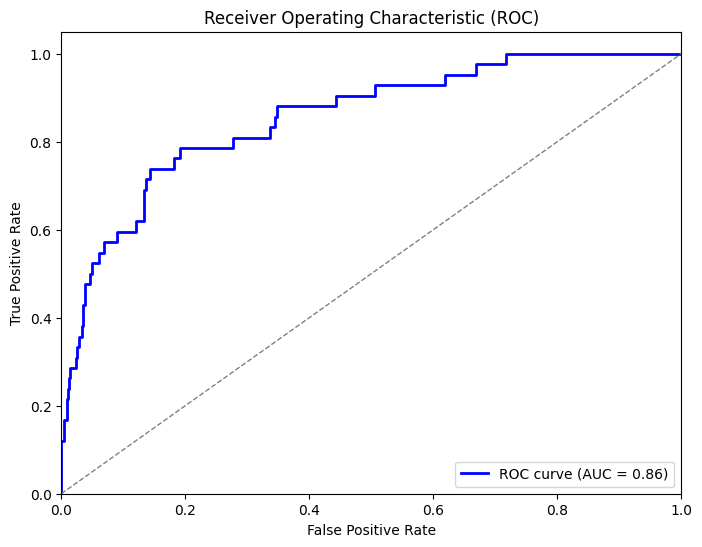

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()